# <font color="maroon"> Prediction of Car price using Multiple Linear Regression </font>

# Step 1 : Importing and understanding the structure of the data

In [49]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [50]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
car_price_data=pd.read_csv('CarPrice_Assignment.csv')
car_price_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
shape=car_price_data.shape
print(color.BOLD + "There are " +str(shape[0])+ " rows  and "+str(shape[1])+" columns")

There are 205 rows  and 26 columns


In [52]:
info=car_price_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Step 2: Pre-processing the data


   #### a. Handling the missing values,Dropping the unnecessary columns
   #### b. Handling the outliers
   #### c. Transforming the skewed variables
   #### d. Dummy coding the categorical variables
   #### e. Splitting the data
   #### e. Scaling the numerical variables in the training dataset as the range impact linear regression results

### <font color="maroon"> a. Handling the missing values

In [53]:
car_price_data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### <font color="maroon"> b. Handling the outliers
An outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error

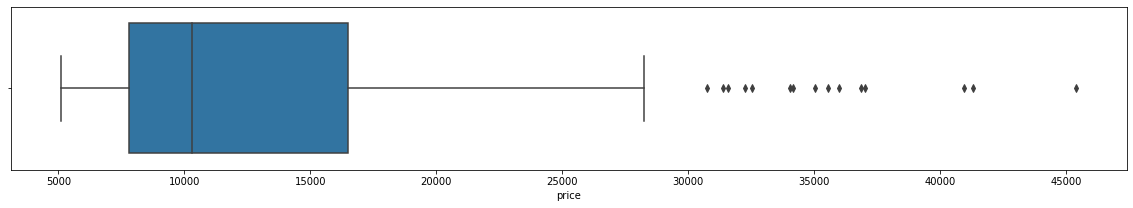

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

#Looking at the boxplot of the target variable
plt.figure(figsize = (20,3))
sns.boxplot(x = 'price', data = car_price_data)
plt.show()

In [55]:
#Looking at the prices above 25000. From looking at the data, we can say that these are the premium cars like bmw,jaguar
car_price_data[car_price_data['price']>25000]['CarName'].str.split(' ').str[0].unique().tolist()

['bmw', 'jaguar', 'buick', 'porcshce', 'porsche']

### Looking at the boxplot of the independent variables

In [56]:
car_price_data.drop(columns=['car_ID'],inplace=True)

In [57]:
#Converting the column Symboling to categorical
car_price_data['symboling']=car_price_data['symboling'].astype('object')

#splitting the columns into numerical and categorical columns
numeric_cols=car_price_data.select_dtypes(include=['int64','float64']).columns

### Visualzing numeric variables 

In [58]:
numeric_cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

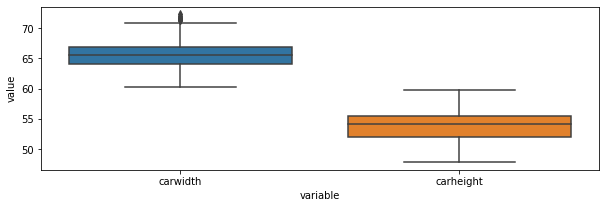

In [59]:
plt.figure(figsize = (10, 3))
df = pd.DataFrame(data = car_price_data , columns = ['carwidth','carheight'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

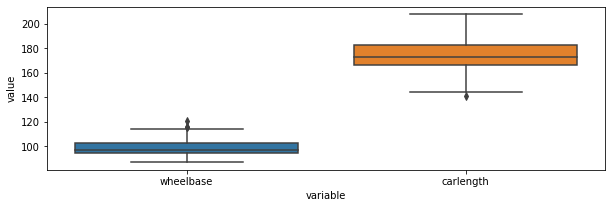

In [60]:
plt.figure(figsize = (10, 3))
df = pd.DataFrame(data = car_price_data , columns = ['wheelbase','carlength'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

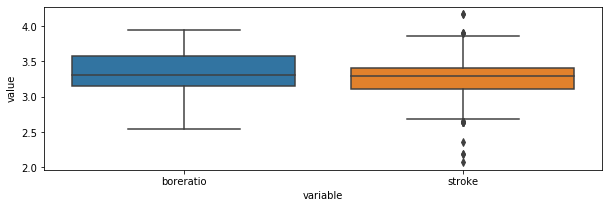

In [61]:
plt.figure(figsize = (10, 3))
df = pd.DataFrame(data = car_price_data , columns = ['boreratio','stroke'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

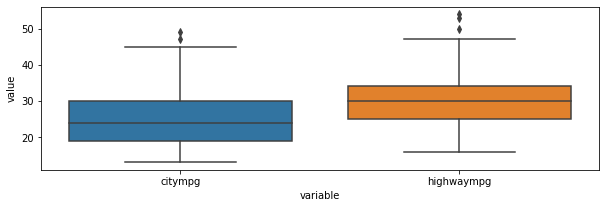

In [62]:
plt.figure(figsize = (10, 3))
df = pd.DataFrame(data = car_price_data , columns = ['citympg','highwaympg'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

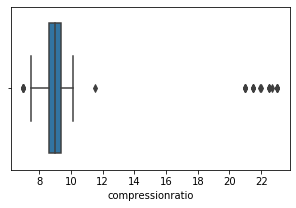

In [63]:
plt.figure(figsize = (5, 3))
sns.boxplot( x = 'compressionratio', data = car_price_data)
plt.show()

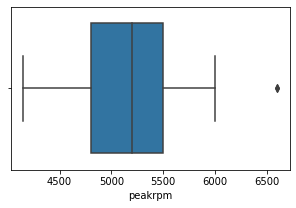

In [64]:
plt.figure(figsize = (5, 3))
sns.boxplot( x = 'peakrpm', data = car_price_data)
plt.show()

In [65]:
print(color.BOLD + 'The skewness of the variables are ')
car_price_data.skew(axis = 0, skipna = True,numeric_only=True) 

The skewness of the variables are 


wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

Most of the variables look like normally distributed. The variables are not skewed

### Correlation Analysis

#### Creating a correlation matrix to look at the issue of multi-collinearity ( correlation among the predictors). Correlation analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning


(69.5, -0.5)

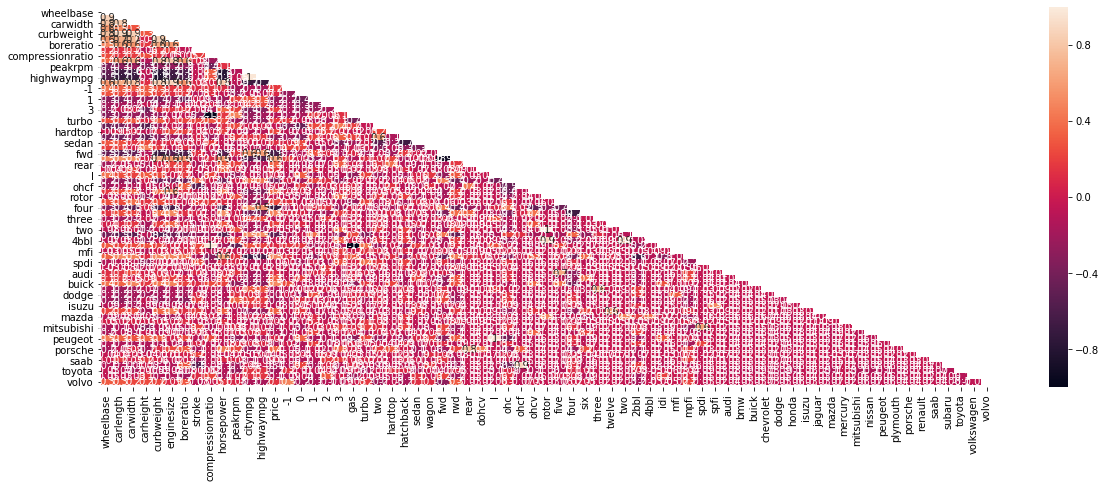

In [85]:
plt.figure(figsize = (20,7))
Matrix = np.triu(car_price_data.corr())
ax=sns.heatmap(car_price_data.corr(), annot=True,fmt='.1g',mask=Matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)

#### Insights from the correlation analysis
    1. Target ( Price of the car ) is highly correlated with enginesize,carwidth,horsepower,mileage of the car.
       Price is negatively correlated with the mileage and positively correlated with engine size,car width, car length
    2. Predictors share lots of variance among themselves ( Multi-collinearity)
       For example, wheelbase is highly correlated with car length and car width
                    Horse power is highly correlated with the mileage 
       Therefore variable selection methods/ Principal component analysis have to be performed to handle this problem

### Visualizing categorical variables 

In [72]:
car_price_data['Company']=car_price_data.CarName.str.split(' ').str[0]
car_price_data.Company.unique()
car_price_data.drop(columns=['CarName'],inplace=True)
#There are some misspelt words in the data set

In [73]:
car_price_data.Company.replace('maxda','mazda',inplace=True)
car_price_data.Company.replace('Nissan','nissan',inplace=True)
car_price_data.Company.replace('porcshce','porsche',inplace=True)
car_price_data.Company.replace('toyouta','toyota',inplace=True)
car_price_data.Company.replace('vokswagen','volkswagen',inplace=True)
car_price_data.Company.replace('vw','volkswagen',inplace=True)

#Looking if there ae no duplicates in the columns
car_price_data.loc[car_price_data.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company


In [74]:
categorical_cols=car_price_data.select_dtypes(include=['object']).columns
print(color.BOLD+ 'The categorical variables are')
categorical_cols

The categorical variables are


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Company'],
      dtype='object')

#### Inference from the bar graphs
    1.Toyota looks like the mostly sold car
    2.There is more demand for the gas fuelled vehicles than the diesel ones
    3.Understandbly most of the vehicles in the data have engine in the front side
    4.There are more sedans followed by hatchbacks  when comapred to other sections 
    5.There are dominatly more cars with 4 cylinders 

### Let's look at the price again each sub-groups

In [75]:
def plot_count(x,fig):
    plt.subplot(22,2,fig)
    sns.countplot(car_price_data[x],palette=("magma"))
    plt.subplot(22,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=car_price_data[x], y=car_price_data.price, palette=("magma"))

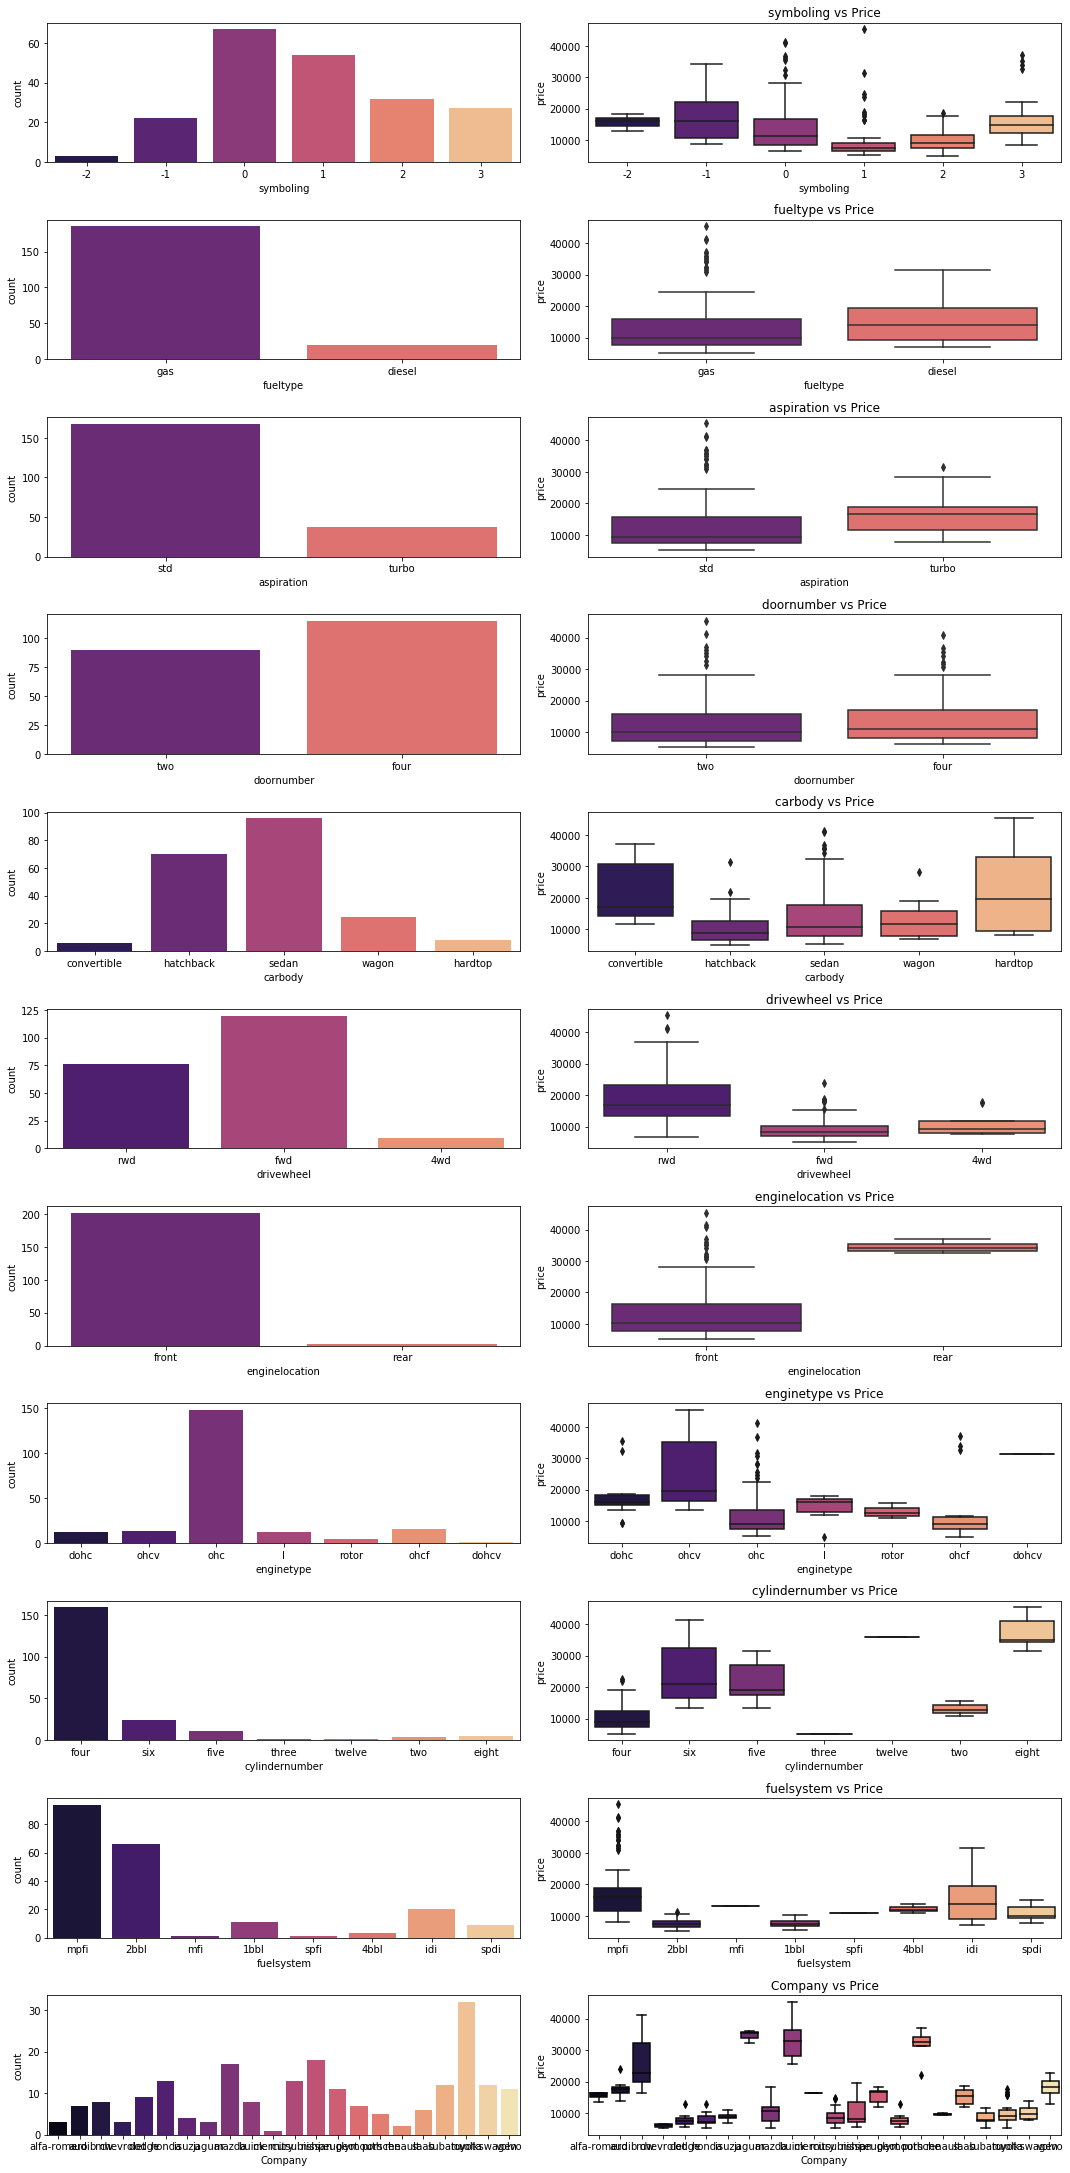

In [76]:
plt.figure(figsize=(15,60))

plot_count('symboling', 1)
plot_count('fueltype', 3)
plot_count('aspiration', 5)
plot_count('doornumber', 7)
plot_count('carbody', 9)
plot_count('drivewheel', 11)
plot_count('enginelocation', 13)
plot_count('enginetype', 15)
plot_count('cylindernumber', 17)
plot_count('fuelsystem', 19)
plot_count('Company', 21)

plt.tight_layout()

## <font color="maroon"> c. Transforming the skewed variables

Most of the data looks like normal distributed. The variables needn't be transformed

## <font color="maroon"> d. Dummy coding the categorical variables

In [77]:
def dummy_coding(column,df):
    temp = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

In [78]:
# Applying the function to create dummy variables

car_price_data = dummy_coding('symboling',car_price_data)
car_price_data = dummy_coding('fueltype',car_price_data)
car_price_data = dummy_coding('aspiration',car_price_data)
car_price_data = dummy_coding('doornumber',car_price_data)
car_price_data = dummy_coding('carbody',car_price_data)
car_price_data = dummy_coding('drivewheel',car_price_data)
car_price_data = dummy_coding('enginelocation',car_price_data)
car_price_data = dummy_coding('enginetype',car_price_data)
car_price_data = dummy_coding('cylindernumber',car_price_data)
car_price_data = dummy_coding('fuelsystem',car_price_data)
car_price_data = dummy_coding('Company',car_price_data)

## <font color="maroon"> e. Splitting the data into train and test

In [79]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(car_price_data, train_size = 0.7, test_size = 0.3, random_state = 100)

#Defining Target variable for the training data set
Y_train = df_train.pop('price')
X_train = df_train

#Defining Target variable for the training data set
Y_test = df_test.pop('price')
X_test = df_test


## <font color="maroon"> f. Scaling the numerical variables in the training data set
    The scaling of the response variable is not required

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_target_cols=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']
df_train[numeric_target_cols] = scaler.fit_transform(df_train[numeric_target_cols])

#  Step 3: Buidling the model before binning the categorical variables

In [81]:
from sklearn.feature_selection import RFE # Importing recursive feature elimination (stepwise)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

Regression_model = LinearRegression()
Regression_model.fit(X_train,Y_train)

#Performing recursive feature eliminate to choose top 10 features
rfe = RFE(Regression_model, 10)
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 13),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 24),
 ('horsepower', False, 8),
 ('peakrpm', False, 10),
 ('citympg', False, 34),
 ('highwaympg', False, 25),
 (-1, False, 36),
 (0, False, 46),
 (1, False, 48),
 (2, False, 47),
 (3, False, 49),
 ('gas', False, 28),
 ('turbo', False, 12),
 ('two', False, 51),
 ('hardtop', False, 30),
 ('hatchback', False, 29),
 ('sedan', False, 31),
 ('wagon', False, 32),
 ('fwd', False, 55),
 ('rwd', False, 38),
 ('rear', True, 1),
 ('dohcv', False, 11),
 ('l', False, 7),
 ('ohc', False, 56),
 ('ohcf', False, 21),
 ('ohcv', False, 45),
 ('rotor', True, 1),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 27),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 3),
 ('2bbl', False, 33),
 ('4bbl', False, 37),
 ('idi', False, 23),
 ('mfi', False, 58),
 ('mpf

In [82]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe

,carwidth,curbweight,enginesize,boreratio,rear,rotor,three,twelve,bmw,porsche
122,0.291667,0.272692,0.139623,0.230159,0,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,0,0,0,0,0,1
166,0.308333,0.314973,0.139623,0.444444,0,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,0,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,0.425000,0.354926,0.184906,0.388889,0,0,0,0,0,0
103,0.516667,0.609775,0.452830,0.595238,0,0,0,0,0,0
67,0.833333,0.786268,0.460377,0.714286,0,0,0,0,0,0
24,0.291667,0.185803,0.109434,0.230159,0,0,0,0,0,0


In [83]:
X = sm.add_constant(X_train_rfe) #Adding the constant
lm = sm.OLS(Y_train,X).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           1.21e-64
Time:                        18:25:13   Log-Likelihood:                -1310.2
No. Observations:                 143   AIC:                             2642.
Df Residuals:                     132   BIC:                             2675.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -653.1759    671.312     -0.973      0.3